# Outline of Code:
- The top sections of code are are all dataset analysis/cleaning and setup/tuning for the following ML Methods.
- Then there are 5 (labeled) code cells, each containing the training and testing for 1 of the ML Methods. They do not print results, but they will print a message once it runs successfully. They all run in less than 30 seconds except for Stacked Generalization which takes 2.5 minutes.
- Lastly is a "Display Results" code cell. Here, you can display all (or only some) of the results and graphs that were generated in the ML Method code cells above. This cell will only display results if you already ran the ML Method code above.

# Notes:
- Running on GPU is recommended.
- I imported the dataset (into Google Colab) using my Kaggle account 2 cells below. You can do the same with your own Kaggle account info or alternatively load the dataset CSV straight into your coding environment. Here's the link to the [Kaggle dataset](https://www.kaggle.com/datasets/goelyash/housing-price-dataset-of-delhiindia/data).

In [ ]:
import pandas as pd
import numpy as np
import builtins
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
import seaborn as sns

In [ ]:
%env KAGGLE_USERNAME= #insert here
%env KAGGLE_KEY= #insert here

!kaggle datasets download -d goelyash/housing-price-dataset-of-delhiindia
!unzip housing-price-dataset-of-delhiindia.zip

In [ ]:
data = pd.read_csv("Delhi_v2.csv")

# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

data.head(5)

Missing values per column:
Unnamed: 0             0
price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
Landmarks           4979
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64


,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [ ]:
data = pd.read_csv("Delhi_v2.csv")

# Drop unneeded columns
columns_to_drop = ['Landmarks', 'Lift', 'Furnished_status', 'parking', 'Unnamed: 0', 'Balcony', 'Price_sqft']
data_encoded = data.drop(columns=columns_to_drop)

# Categorical columns
categorical_columns = ['Status', 'neworold', 'type_of_building']

# One-hot encoding
data_encoded = pd.get_dummies(data_encoded, columns=categorical_columns, drop_first=True)

data_encoded.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,desc,Status_Under Construction,neworold_Resale,type_of_building_Individual House
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,\n\n\n Welcome ...,True,False,False
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,\n\n\n Mapsko M...,False,False,False
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,\n\n\n This pro...,False,False,False
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,\n\n\n AIG Roya...,False,False,False
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,\n\n\n The prop...,False,True,False


In [ ]:
# summary statistics

summary_data = pd.read_csv("Delhi_v2.csv")

# Drop unneeded columns
columns_to_drop = ['Landmarks', 'Lift', 'Furnished_status', 'parking', 'Unnamed: 0', 'Balcony' ]
summary_data = summary_data.drop(columns=columns_to_drop)

summary_data.describe(include='all')

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Status,neworold,type_of_building,desc,Price_sqft
count,7.738000e+03,7738,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7164,7738,7738,7738,7738.000000
unique,NaN,4145,NaN,NaN,NaN,NaN,NaN,2,2,2,4181,NaN
top,NaN,"Raj Nagar Extension, Ghaziabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,Ready to Move,Resale,Flat,\n,NaN
freq,NaN,163,NaN,NaN,NaN,NaN,NaN,7148,6905,6226,3257,NaN
mean,8.320635e+06,NaN,1409.506591,28.552092,77.273476,2.708193,2.501163,NaN,NaN,NaN,NaN,5543.660241
std,7.223197e+06,NaN,718.929581,0.107420,0.180606,0.877026,0.867050,NaN,NaN,NaN,NaN,2408.659307
min,1.700000e+06,NaN,501.000000,28.240023,76.884101,2.000000,2.000000,NaN,NaN,NaN,NaN,2100.000000
25%,4.200000e+06,NaN,990.000000,28.455539,77.078590,2.000000,2.000000,NaN,NaN,NaN,NaN,3950.986915
50%,6.000000e+06,NaN,1250.000000,28.574637,77.345320,3.000000,2.000000,NaN,NaN,NaN,NaN,4972.674332
75%,9.500000e+06,NaN,1650.000000,28.642520,77.421054,3.000000,3.000000,NaN,NaN,NaN,NaN,6350.638693


In [ ]:
# Tuning Learning Rate - takes 50 seconds - not necessary to run

# Random 20% sample of dataset cuz it's very slow otherwise
sampled_data = data_encoded.sample(frac=0.2, random_state=42)

# Split features and target
X = sampled_data.drop(columns=['price', 'Address', 'desc'])
y = sampled_data['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regressor
xgb_model = XGBRegressor(
    n_estimators=1000,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    device='cuda',
    booster='gbtree',
    random_state=42
)

# Parameter grid for random search
param_distributions = {
    'learning_rate': np.linspace(0.01, 0.1, 100)  # Learning rates between 0.01 and 0.1
}

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Scorer using the RMSE function
scorer = make_scorer(rmse, greater_is_better=False)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=10,  # Number of random samples to test
    scoring=scorer,
    cv=3,  # 3-fold cross-validation to prevent overfitting
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

# Evaluate on the test set
y_pred = random_search.best_estimator_.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Resulst
best_params = random_search.best_params_
best_cv_rmse = -random_search.best_score_
print(f"Best learning_rate: {best_params['learning_rate']:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best learning_rate: 0.0455
Test RMSE: 2473875.2919


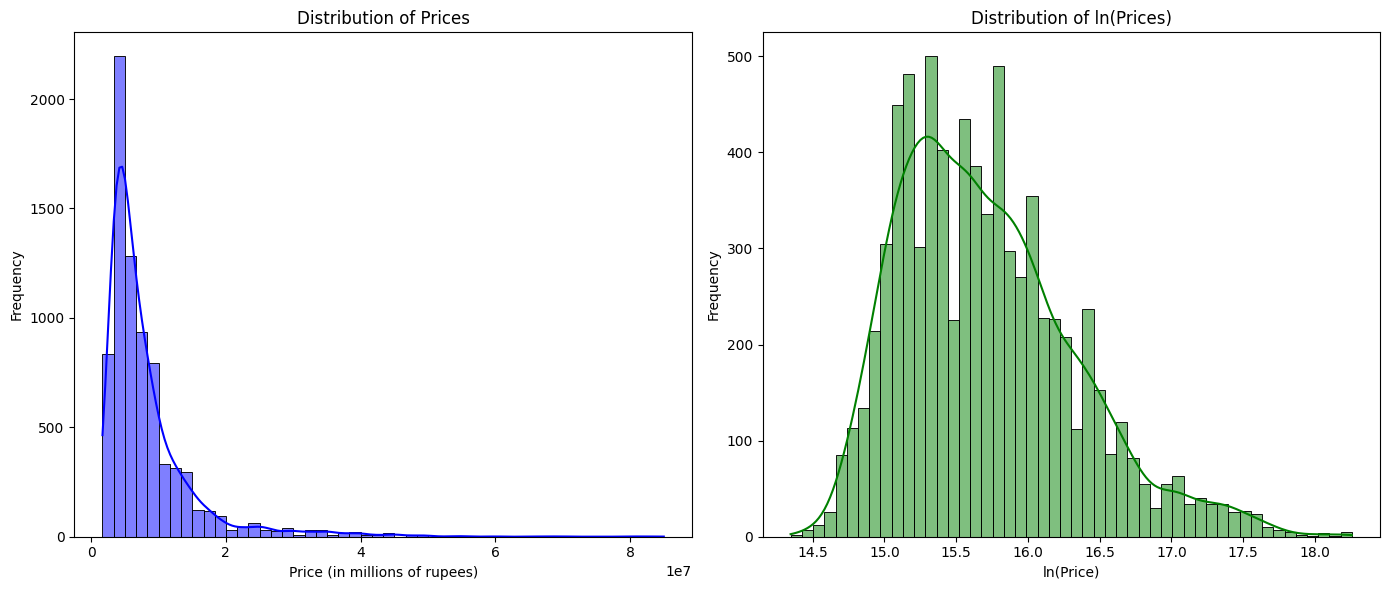

In [ ]:
## distribution of prices - natural log for normalization

# Plot
plt.figure(figsize=(14, 6))

# Distribution of prices
plt.subplot(1, 2, 1)
sns.histplot(data_encoded['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price (in millions of rupees)')
plt.ylabel('Frequency')

# Distribution of ln(prices)
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data_encoded['price']), bins=50, kde=True, color='green')
plt.title('Distribution of ln(Prices)')
plt.xlabel('ln(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# XGBoost

In [ ]:
# xgb

# Suppress warnings
original_print = builtins.print
builtins.print = lambda *args, **kwargs: None  # Suppress all print statements

def run_xgboost(data_filtered):
    X = data_filtered.drop(columns=['price', 'Address', 'desc'])  # Drop target and irrelevant columns
    y = data_filtered['price']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # XGBoost Regressor
    xgb_model = XGBRegressor(
        n_estimators=5000,
        tree_method='hist',
        device='cuda',
        booster='gbtree',
        learning_rate=0.045,
        max_depth=6,
        random_state=42
    )

    # Training
    xgb_model.fit(X_train, y_train)

    # Predictions
    y_pred = xgb_model.predict(X_test)

    # Evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = round(r2_score(y_test, y_pred), 3)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
    mean_price = y_test.mean()
    rmse_percent = (rmse / mean_price) * 100

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': xgb_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Results
    return {
        'rmsle': rmsle,
        'rmse': rmse,
        'rmse_percent': rmse_percent,
        'mae': mae,
        'r2': r2,
        'y_test': y_test,
        'y_pred': y_pred,
        'feature_importance': feature_importance
    }

# Function for ln(price) transformation
def run_xgboost_ln_price(data):
    data_ln = data.copy()
    data_ln['price'] = np.log1p(data_ln['price'])

    X = data_ln.drop(columns=['price', 'Address', 'desc'])
    y = data_ln['price']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # XGBoost Regressor
    xgb_model = XGBRegressor(
        n_estimators=5000,
        tree_method='hist',
        device='cuda',
        booster='gbtree',
        learning_rate=0.045,
        max_depth=6,
        random_state=42
    )

    # Training
    xgb_model.fit(X_train, y_train)

    # Predictions
    y_pred = xgb_model.predict(X_test)

    # Eval
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = round(r2_score(y_test, y_pred), 3)

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': xgb_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Results
    return {
        'rmse': rmse,
        'r2': r2,
        'y_test': y_test,
        'y_pred': y_pred,
        'feature_importance': feature_importance
    }

# Run XGBoost on the original dataset and ln(price) dataset
results_original_xgb = run_xgboost(data_encoded)
results_ln_price_xgb = run_xgboost_ln_price(data_encoded)

# Re-enable print statements
builtins.print = original_print

# Success
print("Done")

Done


# LightGBM

In [ ]:
# Suppress warnings
original_print = builtins.print
builtins.print = lambda *args, **kwargs: None  # Suppress all print statements

# Function to train and evaluate LightGBM
def run_lightgbm(data_filtered):
    X = data_filtered.drop(columns=['price', 'Address', 'desc'])  # Drop target and irrelevant columns
    y = data_filtered['price']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # LightGBM Regressor
    lgbm_model = LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        num_leaves=31, # Default value
        random_state=42,
        boosting_type='gbdt',
        device_type='cpu', # CPU training (gpu didn't work well))
        n_jobs=-1          # All available CPU cores
    )

    # Training
    lgbm_model.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',
    )

    # Predictions
    y_pred = lgbm_model.predict(X_test)

    # Evan
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = round(r2_score(y_test, y_pred), 3)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
    mean_price = y_test.mean()
    rmse_percent = (rmse / mean_price) * 100

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': lgbm_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Results
    return {
        'rmsle': rmsle,
        'rmse': rmse,
        'rmse_percent': rmse_percent,
        'mae': mae,
        'r2': r2,
        'y_test': y_test,
        'y_pred': y_pred,
        'feature_importance': feature_importance
    }

# Function for ln(price) transformation
def run_lightgbm_ln_price(data):
    # Apply ln(price) transformation
    data_ln = data.copy()
    data_ln['price'] = np.log1p(data_ln['price'])

    X = data_ln.drop(columns=['price', 'Address', 'desc'])
    y = data_ln['price']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # LightGBM Regressor
    lgbm_model = LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        num_leaves=31,
        random_state=42,
        boosting_type='gbdt',
        device_type='cpu',
        n_jobs=-1
    )

    # Training
    lgbm_model.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',
    )

    # Predictions
    y_pred = lgbm_model.predict(X_test)

    # Eval
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = round(r2_score(y_test, y_pred), 3)

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': lgbm_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Results
    return {
        'rmse': rmse,
        'r2': r2,
        'y_test': y_test,
        'y_pred': y_pred,
        'feature_importance': feature_importance
    }

# Run LightGBM on the original dataset and ln(price) dataset
results_original_lgbm = run_lightgbm(data_encoded)
results_ln_price_lgbm = run_lightgbm_ln_price(data_encoded)

# Re-enable print statements
builtins.print = original_print

# Success
print("LightGBM Results: Saved")

LightGBM Results: Saved


# Linear Regression

In [ ]:
# Function for Multiple Linear Regression
def run_linear_regression(data_filtered):
    # Split features and target
    X = data_filtered.drop(columns=['price', 'Address', 'desc'])  # Drop target and irrelevant columns
    y = data_filtered['price']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Linear Regression model
    lr_model = LinearRegression()

    # Training
    lr_model.fit(X_train, y_train)

    # Predictions
    y_pred = lr_model.predict(X_test)

    # Prevent negative predictions for RMSLE
    y_pred_non_negative = np.maximum(y_pred, 0)

    # Eval
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = round(r2_score(y_test, y_pred), 3)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred_non_negative)))
    mean_price = y_test.mean()
    rmse_percent = (rmse / mean_price) * 100

    # Feature importance (coefficients)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lr_model.coef_
    }).sort_values(by='Coefficient', key=lambda x: x.abs(), ascending=False)

    # Results
    return {
        'rmsle': rmsle,
        'rmse': rmse,
        'rmse_percent': rmse_percent,
        'mae': mae,
        'r2': r2,
        'y_test': y_test,
        'y_pred': y_pred,
        'feature_importance': feature_importance
    }

# Function for ln(price) transformation
def run_linear_regression_ln_price(data):
    # Apply ln(price) transformation
    data_ln = data.copy()
    data_ln['price'] = np.log1p(data_ln['price'])

    # Split features and target
    X = data_ln.drop(columns=['price', 'Address', 'desc'])  # Drop target and irrelevant columns
    y = data_ln['price']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Linear Regression model
    lr_model = LinearRegression()

    # Training
    lr_model.fit(X_train, y_train)

    # Predictions
    y_pred = lr_model.predict(X_test)

    # Eval
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = round(r2_score(y_test, y_pred), 3)

    # Feature importance (coefficients)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lr_model.coef_
    }).sort_values(by='Coefficient', key=lambda x: x.abs(), ascending=False)

    # Results
    return {
        'rmse': rmse,
        'r2': r2,
        'y_test': y_test,
        'y_pred': y_pred,
        'feature_importance': feature_importance
    }

# Run Linear Regression on the original dataset and ln(price) dataset
results_original_lr = run_linear_regression(data_encoded)
results_ln_price_lr = run_linear_regression_ln_price(data_encoded)

# Success
print("Linear Regression Results: Saved")

Linear Regression Results: Saved


# Random Forest

In [ ]:
# Function for Random Forest Regression
def run_random_forest(data_filtered):
    # Drop target and irrelevant columns
    X = data_filtered.drop(columns=['price', 'Address', 'desc'])
    y = data_filtered['price']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize Random Forest Regressor
    rf_model = RandomForestRegressor(
        n_estimators=1000,          # Number of trees in the forest
        max_depth=6,                # Maximum depth of the tree
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1                   # All available CPU cores
    )

    # Training
    rf_model.fit(X_train, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test)

    # Eval
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = round(r2_score(y_test, y_pred), 3)
    mean_price = y_test.mean()
    rmse_percent = (rmse / mean_price) * 100

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Results
    return {
        'rmse': rmse,
        'rmsle': rmsle,
        'mae': mae,
        'r2': r2,
        'rmse_percent': rmse_percent,
        'y_test': y_test,
        'y_pred': y_pred,
        'feature_importance': feature_importance
    }

# Function to train and evaluate Random Forest on ln(price) dataset
def run_random_forest_ln_price(data):
    # Apply ln(price) transformation
    data_ln = data.copy()
    data_ln['price'] = np.log1p(data_ln['price'])

    # Drop target and irrelevant columns
    X = data_ln.drop(columns=['price', 'Address', 'desc'])
    y = data_ln['price']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Random Forest Regressor
    rf_model = RandomForestRegressor(
        n_estimators=1000,
        max_depth=6,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    )

    # Training
    rf_model.fit(X_train, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test)

    # Eval
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = round(r2_score(y_test, y_pred), 3)

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Results
    return {
        'rmse': rmse,
        'r2': r2,
        'y_test': y_test,
        'y_pred': y_pred,
        'feature_importance': feature_importance
    }

# Run Random Forest on the original dataset and ln(price) dataset
results_original_rf = run_random_forest(data_encoded)
results_ln_price_rf = run_random_forest_ln_price(data_encoded)

# success
print("Random Forest results saved successfully.")

Random Forest results saved successfully.


# Stacked Gen

In [ ]:
device_type = 'cpu'  # for LightGBM

# Function for Stacked Generalization on original data
def run_stacked_generalization(data_filtered):
    # Drop target and irrelevant columns
    X = data_filtered.drop(columns=['price', 'Address', 'desc'])
    y = data_filtered['price']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Base models for stacking
    estimators = [
        ('xgb', XGBRegressor(
            n_estimators=5000,
            tree_method='hist',
            booster='gbtree',
            learning_rate=0.045,
            max_depth=6,
            random_state=42,
            verbosity=0
        )),
        ('lgbm', LGBMRegressor(
            n_estimators=1000,
            learning_rate=0.05,
            max_depth=6,
            num_leaves=31,
            random_state=42,
            boosting_type='gbdt',
            device_type=device_type,
            n_jobs=-1
        )),
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(
            n_estimators=1000,
            max_depth=6,
            min_samples_split=2,
            min_samples_leaf=1,
            random_state=42,
            n_jobs=-1
        ))
    ]

    # Final estimator
    final_estimator = LinearRegression()

    # Stacking Regressor
    stacking_model = StackingRegressor(
        estimators=estimators,
        final_estimator=final_estimator,
        passthrough=False,
        cv=5,
        n_jobs=-1
    )

    # Training
    stacking_model.fit(X_train, y_train)

    # Predictions
    y_pred = stacking_model.predict(X_test)

    # Eval
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = round(r2_score(y_test, y_pred), 3)
    mean_price = y_test.mean()
    rmse_percent = (rmse / mean_price) * 100

    # Feature importances (meta-model coefficients)
    if isinstance(stacking_model.final_estimator_, LinearRegression):
        base_model_names = [name for name, _ in stacking_model.named_estimators_.items()]
        feature_importance = pd.DataFrame({
            'Feature': base_model_names,
            'Coefficient': stacking_model.final_estimator_.coef_
        }).sort_values(by='Coefficient', key=lambda x: x.abs(), ascending=False)
    else:
        feature_importance = pd.DataFrame({'Feature': [], 'Coefficient': []})

    return {
        'rmse': rmse,
        'rmsle': rmsle,
        'mae': mae,
        'r2': r2,
        'rmse_percent': rmse_percent,
        'y_test': y_test,
        'y_pred': y_pred,
        'feature_importance': feature_importance
    }

# Function to train and evaluate Stacked Generalization on ln(price) dataset
def run_stacked_generalization_ln_price(data_filtered):
    # Apply ln(price) transformation
    data_ln = data_filtered.copy()
    data_ln['price'] = np.log1p(data_ln['price'])

    # Drop target and irrelevant columns
    X = data_ln.drop(columns=['price', 'Address', 'desc'])
    y = data_ln['price']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Base models for stacking
    estimators = [
        ('xgb', XGBRegressor(
            n_estimators=5000,
            tree_method='hist',
            booster='gbtree',
            learning_rate=0.045,
            max_depth=6,
            random_state=42,
            verbosity=0
        )),
        ('lgbm', LGBMRegressor(
            n_estimators=1000,
            learning_rate=0.05,
            max_depth=6,
            num_leaves=31,
            random_state=42,
            boosting_type='gbdt',
            device_type=device_type,
            n_jobs=-1
        )),
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(
            n_estimators=1000,
            max_depth=6,
            min_samples_split=2,
            min_samples_leaf=1,
            random_state=42,
            n_jobs=-1
        ))
    ]

    # Final estimator
    final_estimator = LinearRegression()

    # Stacking Regressor
    stacking_model = StackingRegressor(
        estimators=estimators,
        final_estimator=final_estimator,
        passthrough=False,
        cv=5,
        n_jobs=-1
    )

    # Training
    stacking_model.fit(X_train, y_train)

    # Predictions
    y_pred = stacking_model.predict(X_test)

    # Eval
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = round(r2_score(y_test, y_pred), 3)
    mean_price = y_test.mean()
    rmse_percent = (rmse / mean_price) * 100

    # Feature importances (meta-model coefficients)
    if isinstance(stacking_model.final_estimator_, LinearRegression):
        base_model_names = [name for name, _ in stacking_model.named_estimators_.items()]
        feature_importance = pd.DataFrame({
            'Feature': base_model_names,
            'Coefficient': stacking_model.final_estimator_.coef_
        }).sort_values(by='Coefficient', key=lambda x: x.abs(), ascending=False)
    else:
        feature_importance = pd.DataFrame({'Feature': [], 'Coefficient': []})

    return {
        'rmse': rmse,
        'rmsle': rmsle,
        'mae': mae,
        'r2': r2,
        'rmse_percent': rmse_percent,
        'y_test': y_test,
        'y_pred': y_pred,
        'feature_importance': feature_importance
    }

# Run Stacked Generalization on both datasets
results_original_stack = run_stacked_generalization(data_encoded)
results_ln_price_stack = run_stacked_generalization_ln_price(data_encoded)

# success!
print("Stacked Generalization models and results *with feature importance* saved successfully!!")

Stacked Generalization models and results *with feature importance* saved successfully!!


# Display Results

Performance Metrics (XGBoost - Original Dataset)
RMSLE: 0.1595
RMSE: 2034851.2899
R²: 0.9300
RMSE as % of Mean Price: 24.58%
MAE: 1066097.8521


Performance Metrics (XGBoost - ln(price) Dataset)
RMSE: 0.1549
R²: 0.9360




XGBoost Residuals and Prediction vs Actual:


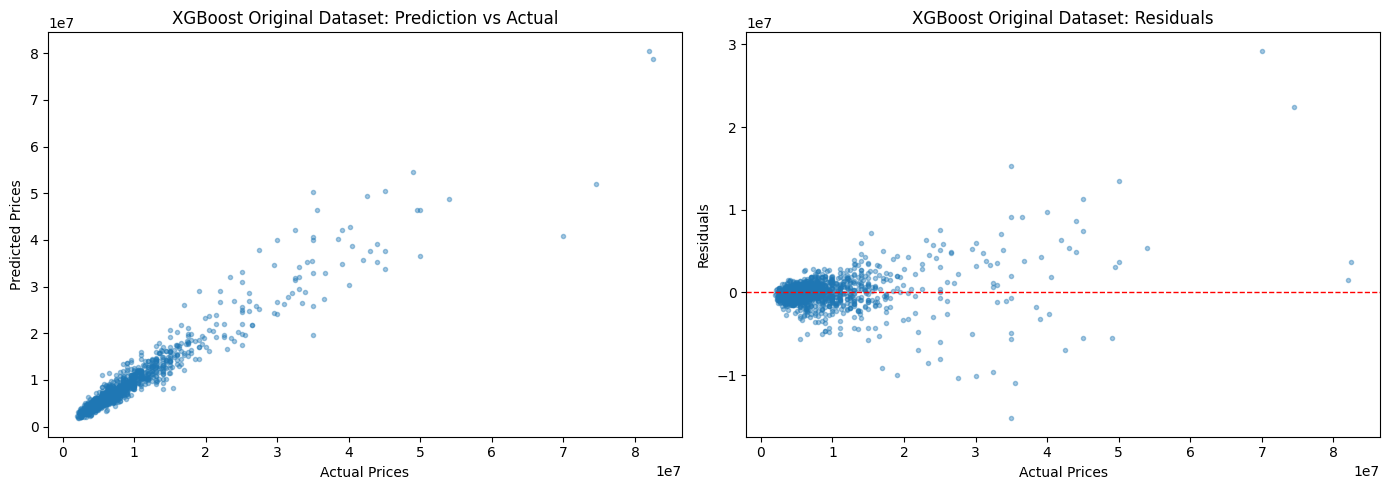

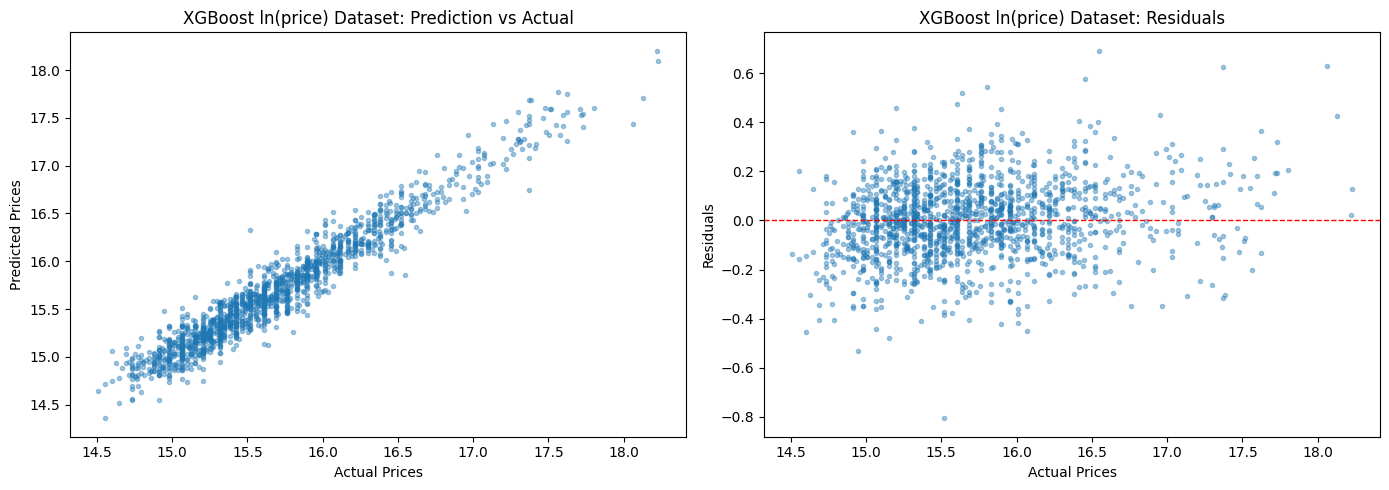



XGBoost Feature Importance:


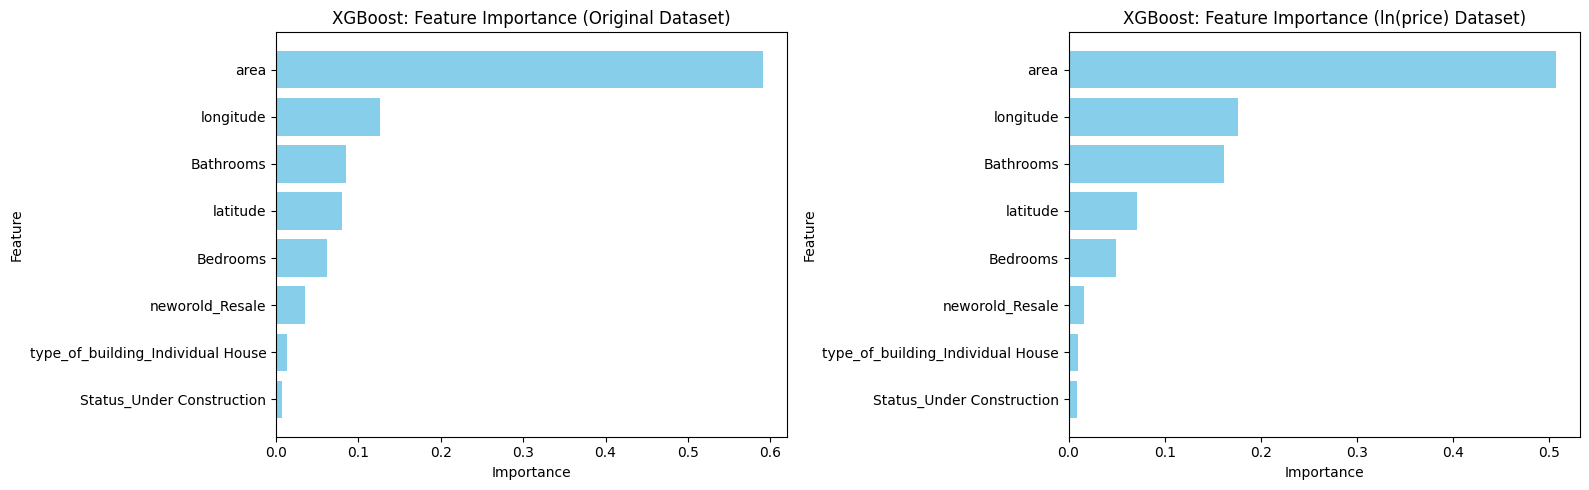



Performance Metrics (LightGBM - Original Dataset)
RMSLE: 0.1704
RMSE: 2227018.2477
R²: 0.9160
RMSE as % of Mean Price: 26.90%
MAE: 1153908.8761


Performance Metrics (LightGBM - ln(price) Dataset)
RMSE: 0.1541
R²: 0.9370




LightGBM Residuals and Prediction vs Actual:


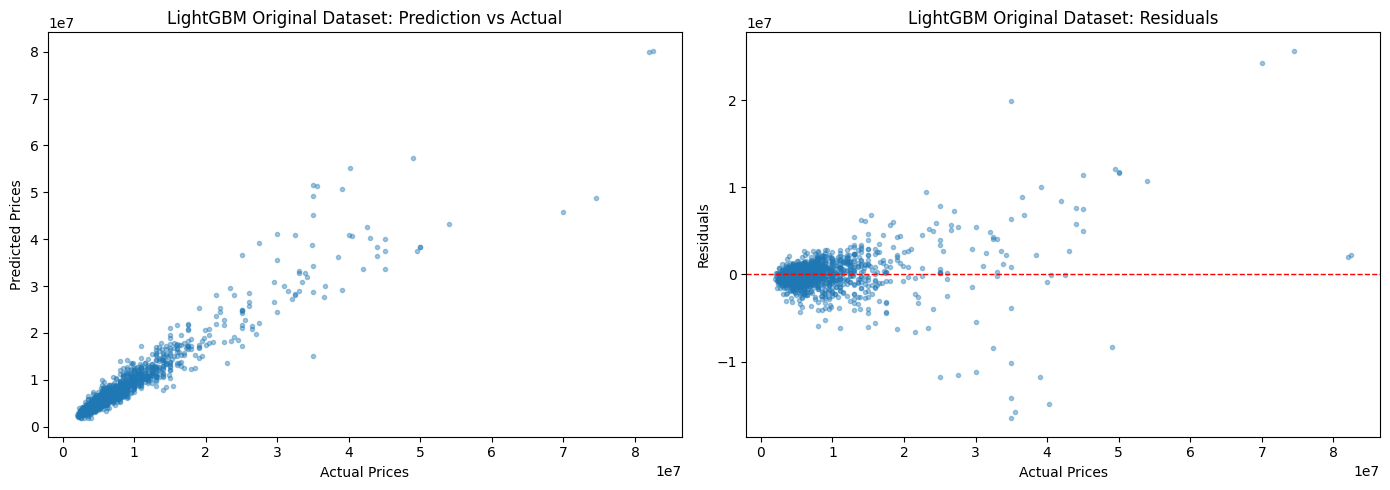

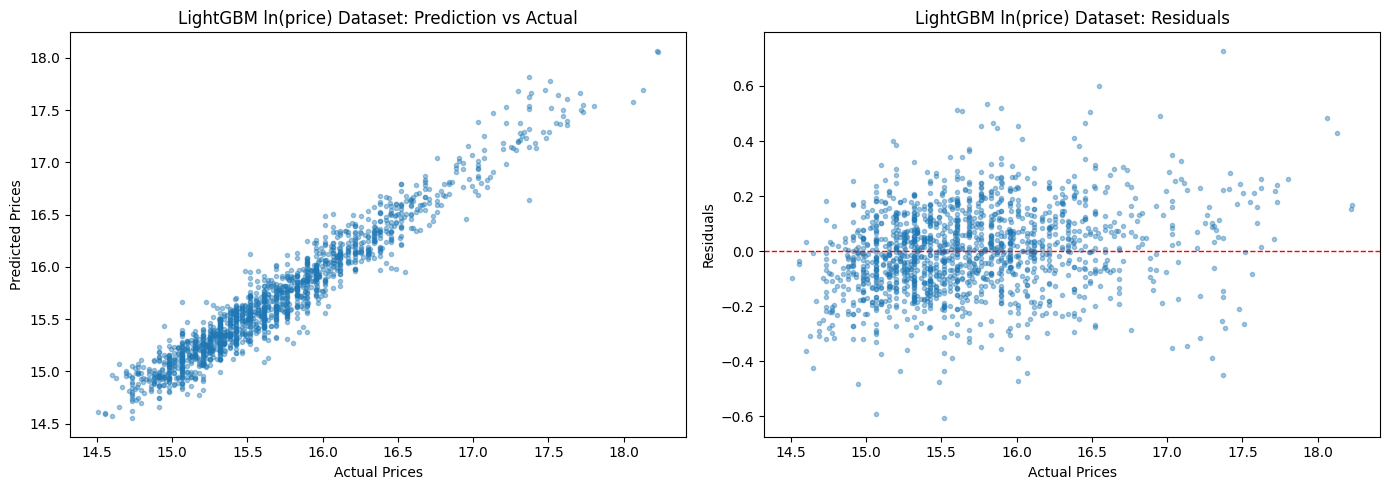



LightGBM Feature Importance:


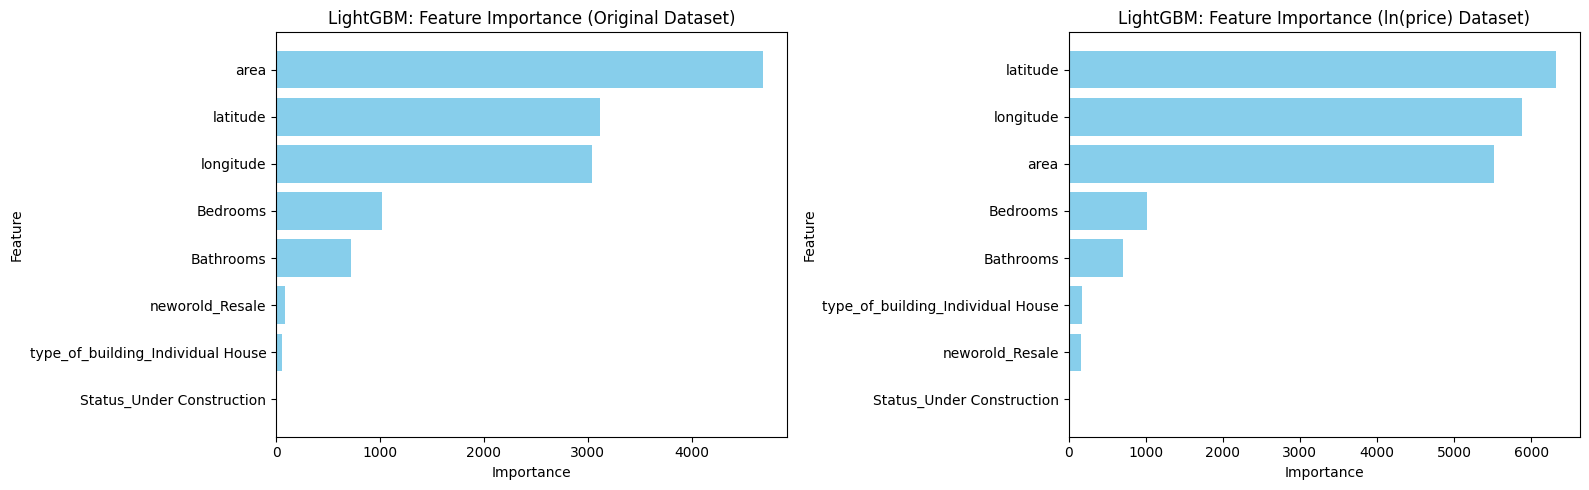



Performance Metrics (Linear Regression - Original Dataset)
RMSLE: 0.6587
RMSE: 3859088.7437
R²: 0.7490
RMSE as % of Mean Price: 46.61%
MAE: 2120080.2281


Performance Metrics (Linear Regression - ln(price) Dataset)
RMSE: 0.3215
R²: 0.7240




Linear Regression Residuals and Prediction vs Actual:


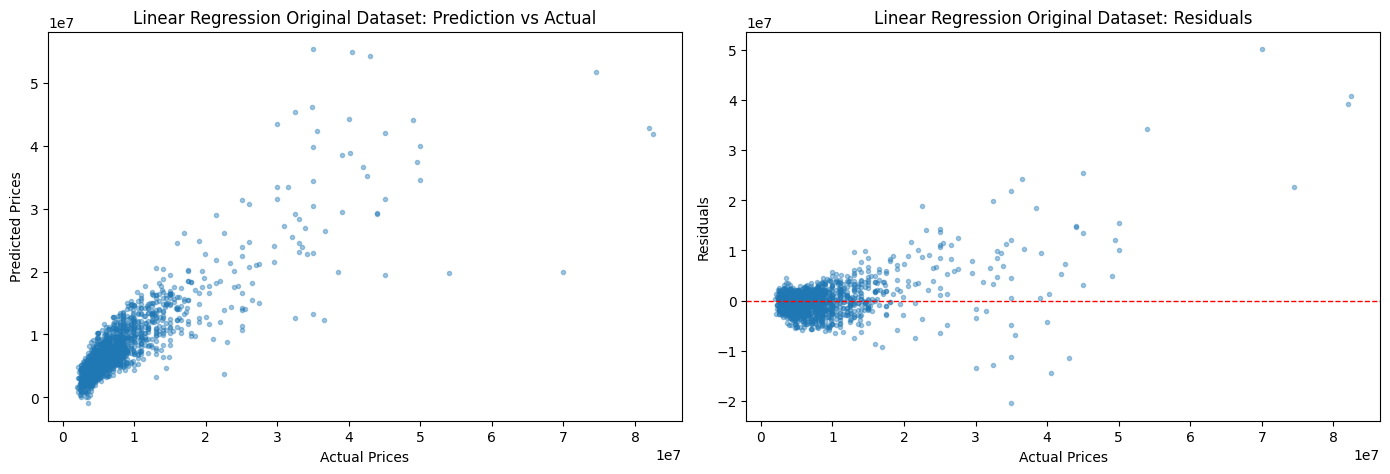

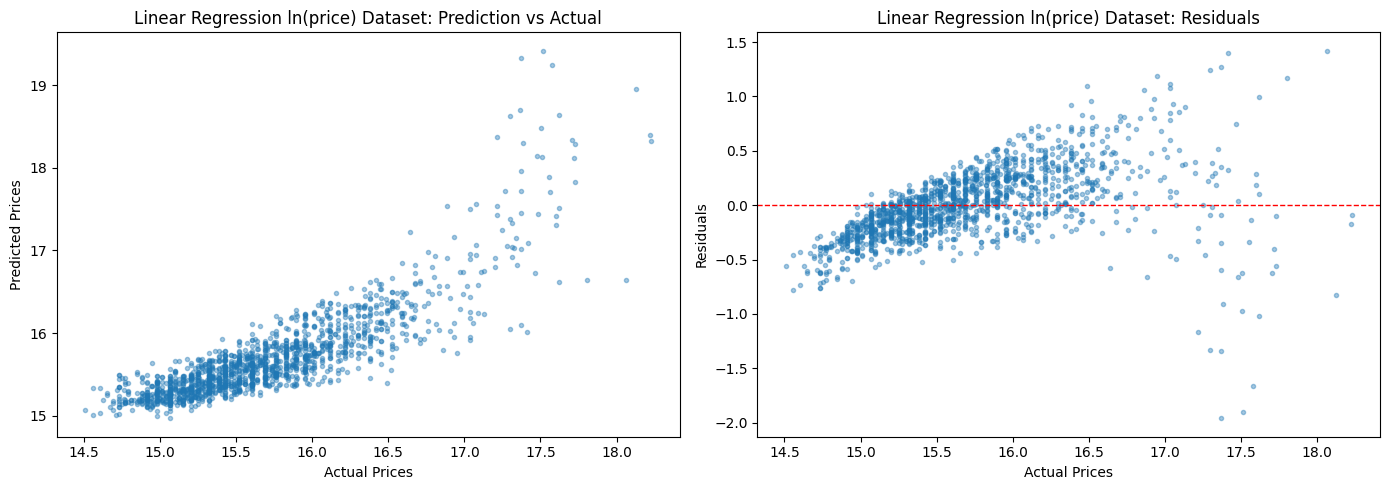



Linear Regression Coefficients:


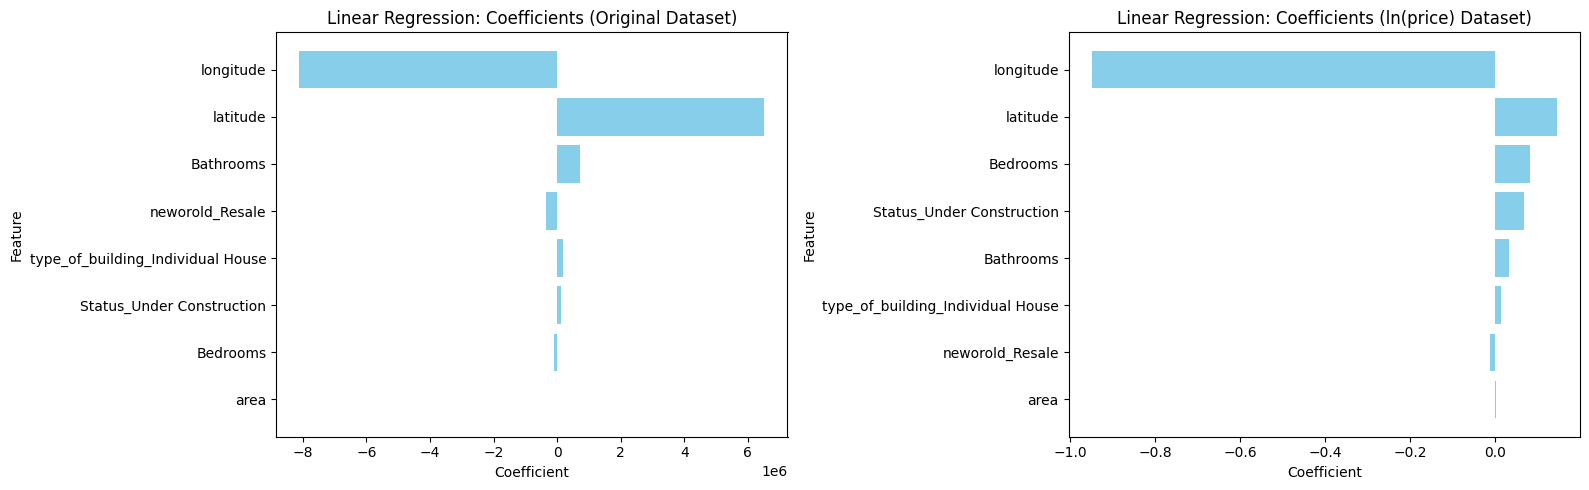



Performance Metrics (Random Forest - Original Dataset)
RMSLE: 0.2127
RMSE: 2529812.6024
R²: 0.8920
RMSE as % of Mean Price: 30.55%
MAE: 1417244.7750


Performance Metrics (Random Forest - ln(price) Dataset)
RMSE: 0.2014
R²: 0.8920




Random Forest Residuals and Prediction vs Actual:


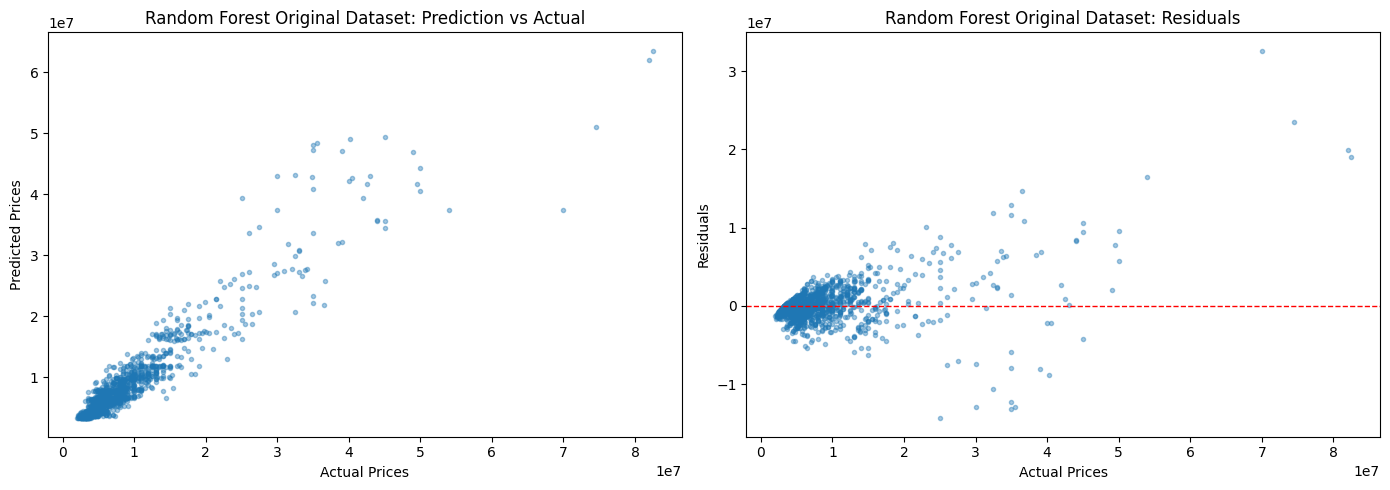

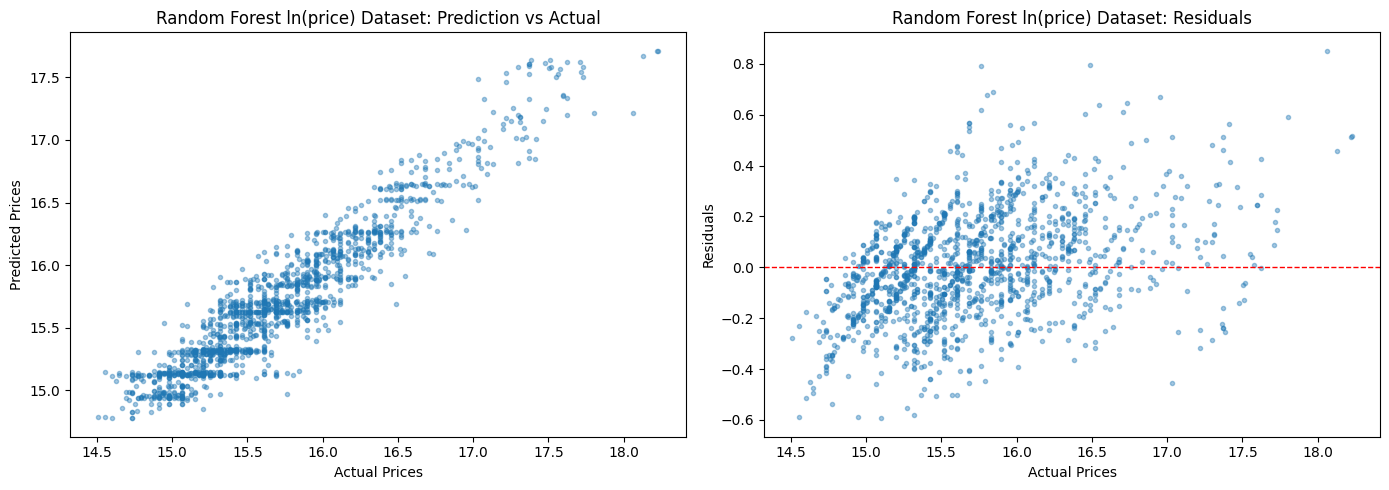



Random Forest Feature Importance:


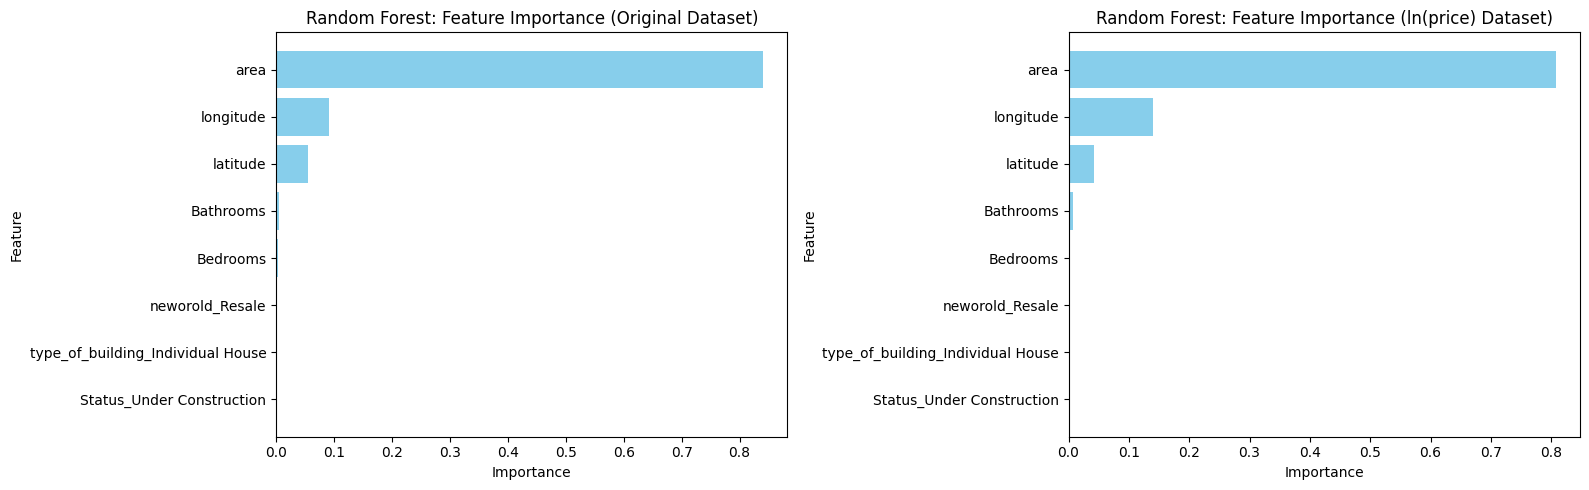



Performance Metrics (Stacked Generalization - Original Dataset)
RMSLE: 0.1566
RMSE: 2075783.2491
R²: 0.9270
RMSE as % of Mean Price: 25.07%
MAE: 1079764.2344


Performance Metrics (Stacked Generalization - ln(price) Dataset)
RMSLE: 0.0089
RMSE: 0.1485
R²: 0.9410
RMSE as % of Mean Price: 0.95%
MAE: 0.1149




Stacked Generalization Residuals and Prediction vs Actual:


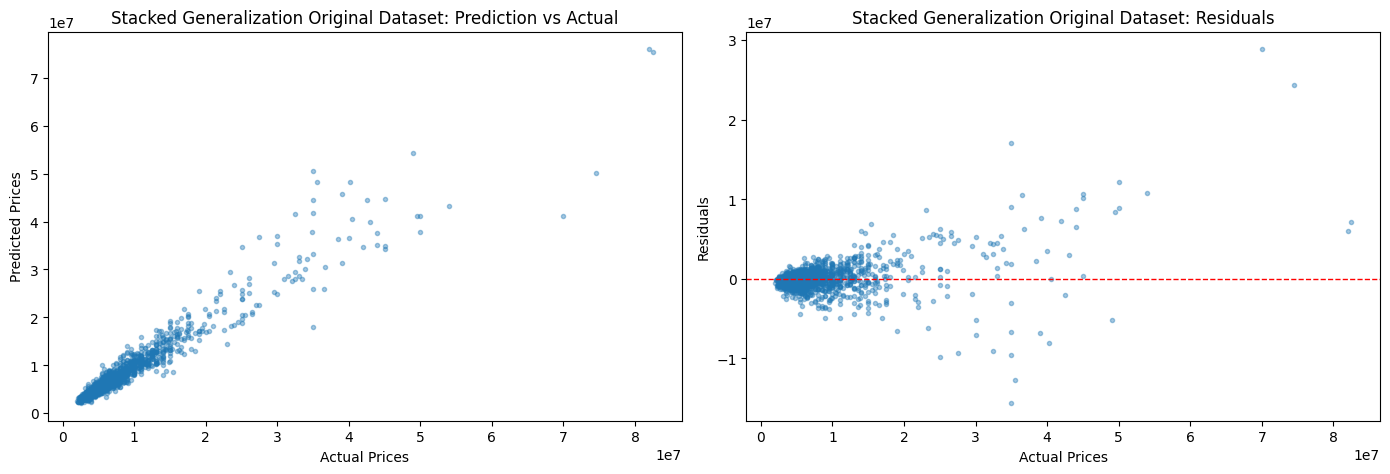

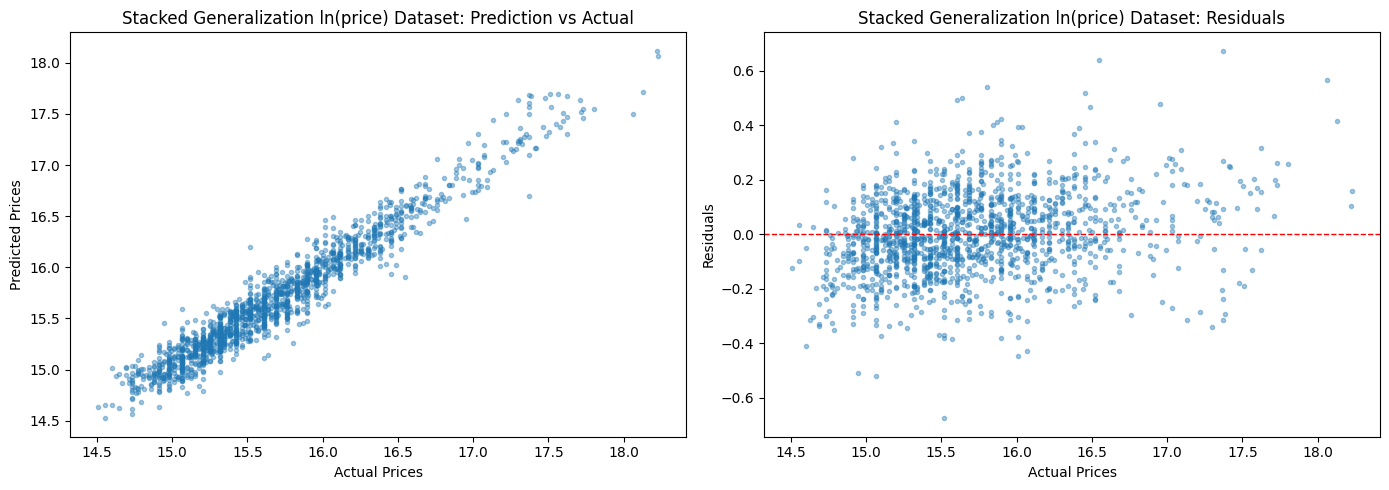



Stacked Generalization Feature Importance:


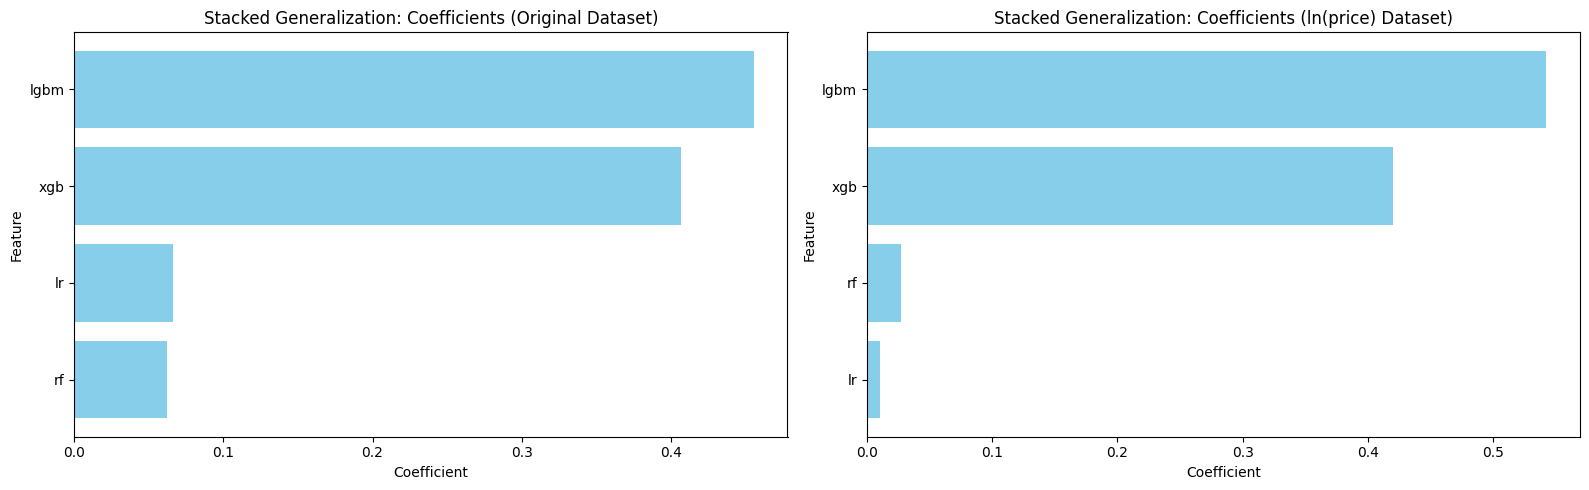

In [ ]:
# Toggle which models to display results for
show_xgb = True  # XGBoost results
show_lgbm = True  # LightGBM results
show_lr = True   # Linear Regression results
show_rf = True   # Random Forest results
show_stack = True  # Stacked Generalization results

# Toggle which types of results to display
show_performance = True  # Performance metrics
show_residuals = True    # Residuals + prediction vs actuals graphs
show_feature_importance = True  # Feature importance graphs


# Function to display performance results
def display_performance(results, title, is_ln_price=False):
    print(title)
    if 'rmsle' in results and not is_ln_price:
        print(f"RMSLE: {results['rmsle']:.4f}")
    print(f"RMSE: {results['rmse']:.4f}")
    print(f"R²: {results['r2']:.4f}")
    if not is_ln_price:
        if 'rmse_percent' in results:
            print(f"RMSE as % of Mean Price: {results['rmse_percent']:.2f}%")
        if 'mae' in results:
            print(f"MAE: {results['mae']:.4f}")
    print("\n")

# Function to plot residuals and prediction vs actual graphs
def plot_residuals_and_actuals(y_test, y_pred, model_name, transformation_type):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Prediction vs Actuals
    axes[0].scatter(y_test, y_pred, alpha=0.4, marker=".")
    axes[0].set_title(f"{model_name} {transformation_type}: Prediction vs Actual")
    axes[0].set_xlabel("Actual Prices")
    axes[0].set_ylabel("Predicted Prices")

    # Residuals
    residuals = y_test - y_pred
    axes[1].scatter(y_test, residuals, alpha=0.4, marker=".")
    axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[1].set_title(f"{model_name} {transformation_type}: Residuals")
    axes[1].set_xlabel("Actual Prices")
    axes[1].set_ylabel("Residuals")

    plt.tight_layout()
    plt.show()

# Function to plot feature importance
def plot_feature_importance(feature_importance_orig, feature_importance_ln, model_name, is_lr=False):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Original Dataset Feature Importance
    if is_lr:
        axes[0].barh(feature_importance_orig['Feature'], feature_importance_orig['Coefficient'], color='skyblue')
        axes[0].set_title(f"{model_name}: Coefficients (Original Dataset)")
        axes[0].set_xlabel("Coefficient")
    else:
        axes[0].barh(feature_importance_orig['Feature'], feature_importance_orig['Importance'], color='skyblue')
        axes[0].set_title(f"{model_name}: Feature Importance (Original Dataset)")
        axes[0].set_xlabel("Importance")
    axes[0].set_ylabel("Feature")
    axes[0].invert_yaxis()

    # ln(price) Transformed Dataset Feature Importance
    if is_lr:
        axes[1].barh(feature_importance_ln['Feature'], feature_importance_ln['Coefficient'], color='skyblue')
        axes[1].set_title(f"{model_name}: Coefficients (ln(price) Dataset)")
        axes[1].set_xlabel("Coefficient")
    else:
        axes[1].barh(feature_importance_ln['Feature'], feature_importance_ln['Importance'], color='skyblue')
        axes[1].set_title(f"{model_name}: Feature Importance (ln(price) Dataset)")
        axes[1].set_xlabel("Importance")
    axes[1].set_ylabel("Feature")
    axes[1].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Display results for each model
if show_xgb:
    if show_performance:
        display_performance(results_original_xgb, "Performance Metrics (XGBoost - Original Dataset)")
        display_performance(results_ln_price_xgb, "Performance Metrics (XGBoost - ln(price) Dataset)")
        print("\n")

    if show_residuals:
        # Residuals and Actual vs Predicted for XGBoost
        print("XGBoost Residuals and Prediction vs Actual:")
        plot_residuals_and_actuals(
            results_original_xgb['y_test'],
            results_original_xgb['y_pred'],
            "XGBoost",
            "Original Dataset"
        )
        plot_residuals_and_actuals(
            results_ln_price_xgb['y_test'],
            results_ln_price_xgb['y_pred'],
            "XGBoost",
            "ln(price) Dataset"
        )
        print("\n")

    if show_feature_importance:
        print("XGBoost Feature Importance:")
        plot_feature_importance(
            results_original_xgb['feature_importance'],
            results_ln_price_xgb['feature_importance'],
            "XGBoost"
        )
        print("\n")

if show_lgbm:
    if show_performance:
        display_performance(results_original_lgbm, "Performance Metrics (LightGBM - Original Dataset)")
        display_performance(results_ln_price_lgbm, "Performance Metrics (LightGBM - ln(price) Dataset)")
        print("\n")

    if show_residuals:
        # Residuals and Actual vs Predicted for LightGBM
        print("LightGBM Residuals and Prediction vs Actual:")
        plot_residuals_and_actuals(
            results_original_lgbm['y_test'],
            results_original_lgbm['y_pred'],
            "LightGBM",
            "Original Dataset"
        )
        plot_residuals_and_actuals(
            results_ln_price_lgbm['y_test'],
            results_ln_price_lgbm['y_pred'],
            "LightGBM",
            "ln(price) Dataset"
        )
        print("\n")

    if show_feature_importance:
        print("LightGBM Feature Importance:")
        plot_feature_importance(
            results_original_lgbm['feature_importance'],
            results_ln_price_lgbm['feature_importance'],
            "LightGBM"
        )
        print("\n")

if show_lr:
    if show_performance:
        display_performance(results_original_lr, "Performance Metrics (Linear Regression - Original Dataset)")
        display_performance(results_ln_price_lr, "Performance Metrics (Linear Regression - ln(price) Dataset)", is_ln_price=True)
        print("\n")

    if show_residuals:
        print("Linear Regression Residuals and Prediction vs Actual:")
        plot_residuals_and_actuals(
            results_original_lr['y_test'],
            results_original_lr['y_pred'],
            "Linear Regression",
            "Original Dataset"
        )
        plot_residuals_and_actuals(
            results_ln_price_lr['y_test'],
            results_ln_price_lr['y_pred'],
            "Linear Regression",
            "ln(price) Dataset"
        )
        print("\n")

    if show_feature_importance:
        print("Linear Regression Coefficients:")
        plot_feature_importance(
            results_original_lr['feature_importance'],
            results_ln_price_lr['feature_importance'],
            "Linear Regression",
            is_lr=True
        )
        print("\n")

if show_rf:
    if show_performance:
        display_performance(results_original_rf, "Performance Metrics (Random Forest - Original Dataset)")
        display_performance(results_ln_price_rf, "Performance Metrics (Random Forest - ln(price) Dataset)")
        print("\n")

    if show_residuals:
        # Residuals and Actual vs Predicted for Random Forest
        print("Random Forest Residuals and Prediction vs Actual:")
        plot_residuals_and_actuals(
            results_original_rf['y_test'],
            results_original_rf['y_pred'],
            "Random Forest",
            "Original Dataset"
        )
        plot_residuals_and_actuals(
            results_ln_price_rf['y_test'],
            results_ln_price_rf['y_pred'],
            "Random Forest",
            "ln(price) Dataset"
        )
        print("\n")

    if show_feature_importance:
        print("Random Forest Feature Importance:")
        plot_feature_importance(
            results_original_rf['feature_importance'],
            results_ln_price_rf['feature_importance'],
            "Random Forest"
        )
        print("\n")

if show_stack:
    if show_performance:
        display_performance(results_original_stack, "Performance Metrics (Stacked Generalization - Original Dataset)")
        display_performance(results_ln_price_stack, "Performance Metrics (Stacked Generalization - ln(price) Dataset)")
        print("\n")

    if show_residuals:
        # Residuals and Actual vs Predicted for Stacked Generalization
        print("Stacked Generalization Residuals and Prediction vs Actual:")
        plot_residuals_and_actuals(
            results_original_stack['y_test'],
            results_original_stack['y_pred'],
            "Stacked Generalization",
            "Original Dataset"
        )
        plot_residuals_and_actuals(
            results_ln_price_stack['y_test'],
            results_ln_price_stack['y_pred'],
            "Stacked Generalization",
            "ln(price) Dataset"
        )
        print("\n")

    if show_feature_importance:
        print("Stacked Generalization Feature Importance:")
        plot_feature_importance(
            results_original_stack['feature_importance'],
            results_ln_price_stack['feature_importance'],
            "Stacked Generalization",
            is_lr=True # needs is_lr=True since the meta-model is linear regression
        )
        print("\n")